# Covid-19 Monitoring Notebook
The Johns Hopkins Center for Systems Science and Engineering (CSSE) operates a [dashboard](https://systems.jhu.edu/research/public-health/ncov/) on the Web to follow the covid-19 cases and deaths all over the world. The data is collected on a daily basis from different sources and has been made available on [Github](https://github.com/CSSEGISandData/COVID-19). This is a selection for some European countries. The observed cases are shown for each country and then merged together for comparison. 

[Italy](#Italy)  
[Germany](#Germany)  
[France](#France)  
[Spain](#Spain)  
[Comparisons](#Comparisons)

***
## Definitions
We follow the definitions for measures as given in the book by Bonita et al., [Basic Epidemiology, 2nd ed.](https://apps.who.int/iris/handle/10665/43541) available in different languages from the World Health Organization website.  
Prevalence of a disease: ratio of the number of people with the disease to the number of people observed at a certain point in time.  
Case fatality: proportion of cases with a specified disease or condition who die within a specified time.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

***
## Harvested data sources

### Johns Hopkins CSSE Github repository

In [2]:
url_confirmed = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
confirmed = pd.read_csv(url_confirmed) 
url_deaths = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv"
deaths = pd.read_csv(url_deaths)

### Eurostat population data

In [3]:
url_population = "https://raw.githubusercontent.com/luigiselmi/datascience/master/data/eurostat_population_by_age_2019.csv"
population = pd.read_csv(url_population)

### Eurostat health care facilities
Number of available beds (2017)

In [4]:
url_beds = "https://raw.githubusercontent.com/luigiselmi/datascience/master/data/eurostat_hlth_rs_bds.csv"
beds = pd.read_csv(url_beds)

***
## Italy

In [5]:
population_it = population[population['country_code'] == 'IT']['total'].values
print("Italy's population (2019) = %d"%population_it)

Italy's population (2019) = 60359546


In [6]:
beds_it = beds[beds['country_code'] == 'IT']['2017'].values
print("Italy's public and private health care facilities, available beds in 2017 = %d"%beds_it)

Italy's public and private health care facilities, available beds in 2017 = 192548


In [7]:
people_per_bed_it =  population_it / beds_it 
print("Number of persons per bed = %.0f"%people_per_bed_it)

Number of persons per bed = 313


### Confirmed infections

In [8]:
confirmed_infections_italy = confirmed[confirmed['Country/Region'] == 'Italy'].T[4:]
confirmed_infections_italy.T # show the data in a row

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20
16,0,0,0,0,0,0,0,0,0,2,...,2502,3089,3858,4636,5883,7375,9172,10149,12462,12462


### Cumulative deaths

In [9]:
cumulative_deaths_italy = deaths[deaths['Country/Region'] == 'Italy'].T[4:]
cumulative_deaths_italy.T # show the data in a row

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20
16,0,0,0,0,0,0,0,0,0,0,...,79,107,148,197,233,366,463,631,827,827


### Deaths per day
The data gives the cumulative deaths so the deaths per day is the difference between two consecutive days

In [10]:
days = cumulative_deaths_italy.index
days.size

51

In [11]:
deaths_per_day_italy = [cumulative_deaths_italy.values[i + 1][0] - cumulative_deaths_italy.values[i][0] for i in range(0,days.size - 1)]

In [12]:
# resize the default plot
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

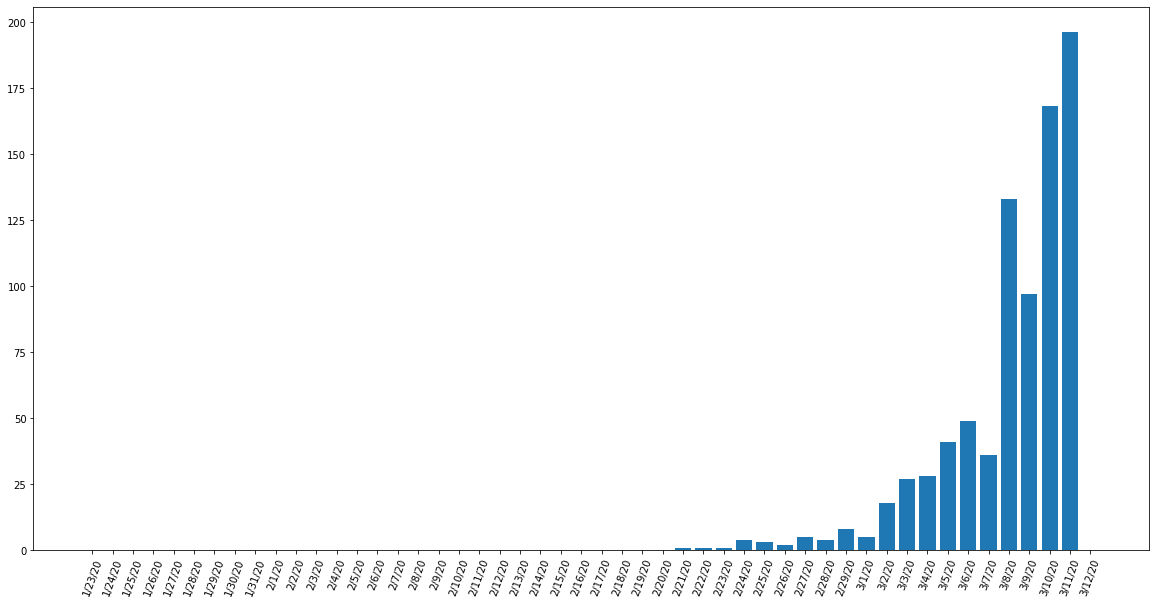

In [13]:
plot_deaths_per_day_italy = plt.bar(days[1:days.size], deaths_per_day_italy[:days.size - 1])
plt.xticks(rotation=70)
plt.show(plot_deaths_per_day_italy)

### Case fatality

In [14]:
infections_italy = confirmed_infections_italy.values[days.size - 1]
deaths_italy = cumulative_deaths_italy.values[days.size - 1];
case_fatality_italy = (deaths_italy / infections_italy) * 100 
print("Italy's case fatality = %.1f"%case_fatality_italy)  

Italy's case fatality = 6.6


***
## Germany

In [15]:
population_de = population[population['country_code'] == 'DE']['total']
print("Germany's population (2019) = %d"%population_de)

Germany's population (2019) = 83019213


In [16]:
beds_de = beds[beds['country_code'] == 'DE']['2017'].values
print("Germany's public and private health care facilities, available beds in 2017 = %d"%beds_de)

Germany's public and private health care facilities, available beds in 2017 = 661448


In [17]:
people_per_bed_de =  population_de / beds_de 
print("Number of persons per bed = %.0f"%people_per_bed_de)

Number of persons per bed = 126


### Confirmed infections

In [18]:
confirmed_infections_germany = confirmed[confirmed['Country/Region'] == 'Germany'].T[4:]
confirmed_infections_germany.T # show data

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20
11,0,0,0,0,0,1,4,4,4,5,...,196,262,482,670,799,1040,1176,1457,1908,2078


### Cumulative deaths

In [19]:
cumulative_deaths_germany = deaths[deaths['Country/Region'] == 'Germany'].T[4:]
cumulative_deaths_germany.T # show data

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,2,3,3


### Deaths per day

The data gives the cumulative deaths so the deaths per day is the difference between two consecutive days

In [20]:
deaths_per_day_germany = [cumulative_deaths_germany.values[i + 1][0] - cumulative_deaths_germany.values[i][0] for i in range(0,days.size - 1)]

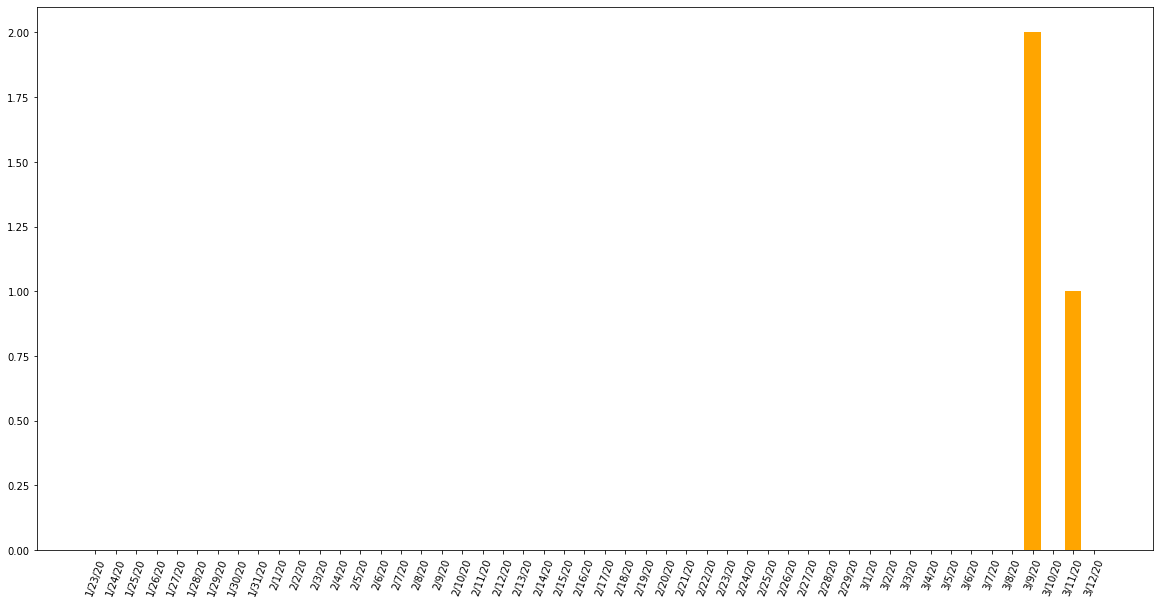

In [21]:
plot_deaths_per_day_germany = plt.bar(days[1:days.size], deaths_per_day_germany[:days.size - 1], color='orange')
plt.xticks(rotation=70)
plt.show(plot_deaths_per_day_germany)

### Case fatality

In [22]:
infections_germany = confirmed_infections_germany.values[days.size - 1]
deaths_germany = cumulative_deaths_germany.values[days.size - 1];
case_fatality_germany = (deaths_germany / infections_germany) * 100 
print("Germany's case fatality = %.1f"%case_fatality_germany)  

Germany's case fatality = 0.1


***
## France

In [23]:
population_fr = population[population['country_code'] == 'FR']['total']
print("France's population (2019) = %d"%population_fr)

France's population (2019) = 67012883


In [24]:
beds_fr = beds[beds['country_code'] == 'FR']['2017'].values
print("France's public and private health care facilities, available beds in 2017 = %d"%beds_fr)

France's public and private health care facilities, available beds in 2017 = 399865


In [25]:
people_per_bed_fr =  population_fr / beds_fr 
print("Number of persons per bed = %.0f"%people_per_bed_fr)

Number of persons per bed = 168


### Confirmed infections

In [26]:
confirmed_infections_france = confirmed[confirmed['Province/State'] == 'France'].T[4:]
confirmed_infections_france.T # show data

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20
159,0,0,2,3,3,3,4,5,5,5,...,204,285,377,653,949,1126,1209,1784,2281,2281


### Cumulative deaths

In [27]:
cumulative_deaths_france = deaths[deaths['Province/State'] == 'France'].T[4:]
cumulative_deaths_france.T # show data

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20
159,0,0,0,0,0,0,0,0,0,0,...,4,4,6,9,11,19,19,33,48,48


### Deaths per day

The data gives the cumulative deaths so the deaths per day is the difference between two consecutive days

In [28]:
deaths_per_day_france = [cumulative_deaths_france.values[i + 1][0] - cumulative_deaths_france.values[i][0] for i in range(0,days.size - 1)]

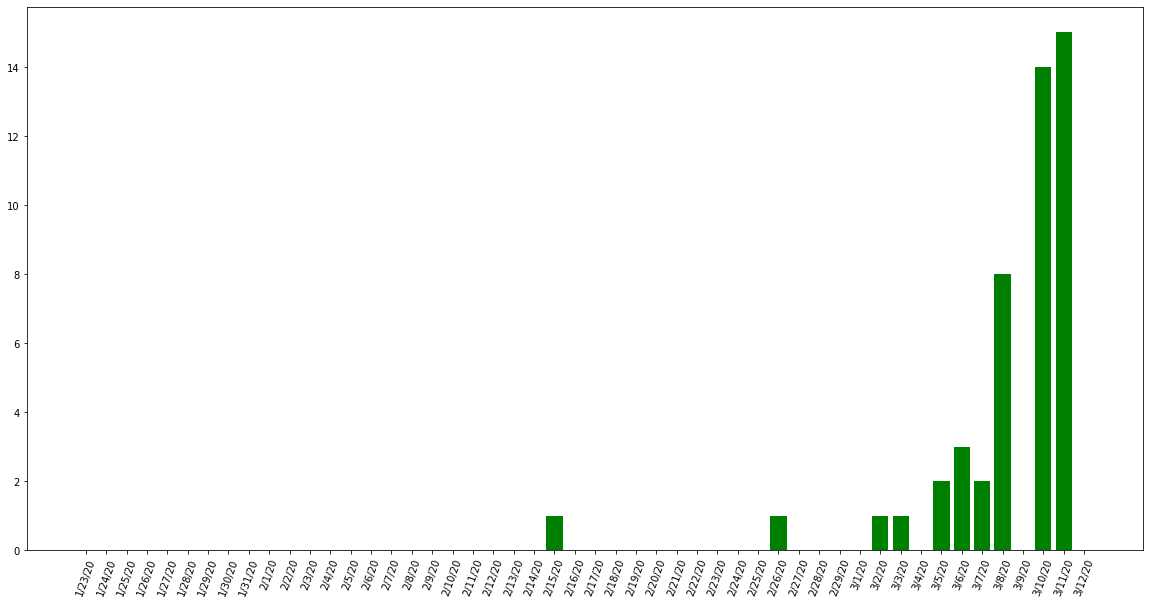

In [29]:
plot_deaths_per_day_france = plt.bar(days[1:days.size], deaths_per_day_france[:days.size - 1], color='green')
plt.xticks(rotation=70)
plt.show(plot_deaths_per_day_france)

### Case fatality

In [30]:
infections_france = confirmed_infections_france.values[days.size - 1]
deaths_france = cumulative_deaths_france.values[days.size - 1];
case_fatality_france = (deaths_france / infections_france) * 100 
print("France's case fatality = %.1f"%case_fatality_france)  

France's case fatality = 2.1


***
## Spain

In [31]:
population_es = population[population['country_code'] == 'ES']['total']
print("Spain's population (2019) = %d"%population_es)

Spain's population (2019) = 46937060


In [32]:
beds_es = beds[beds['country_code'] == 'ES']['2017'].values
print("Spain's public and private health care facilities, available beds in 2017 = %d"%beds_es)

Spain's public and private health care facilities, available beds in 2017 = 138511


In [33]:
people_per_bed_es =  population_es / beds_es 
print("Number of persons per bed = %.0f"%people_per_bed_es)

Number of persons per bed = 339


### Confirmed infections

In [34]:
confirmed_infections_spain = confirmed[confirmed['Country/Region'] == 'Spain'].T[4:]
confirmed_infections_spain.T # show the data in a row

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20
18,0,0,0,0,0,0,0,0,0,0,...,165,222,259,400,500,673,1073,1695,2277,2277


### Cumulative deaths

In [35]:
cumulative_deaths_spain = deaths[deaths['Country/Region'] == 'Spain'].T[4:]
cumulative_deaths_spain.T # show the data in a row

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20
18,0,0,0,0,0,0,0,0,0,0,...,1,2,3,5,10,17,28,35,54,55


### Deaths per day
The data gives the cumulative deaths so the deaths per day is the difference between two consecutive days

In [36]:
deaths_per_day_spain = [cumulative_deaths_spain.values[i + 1][0] - cumulative_deaths_spain.values[i][0] for i in range(0,days.size - 1)]

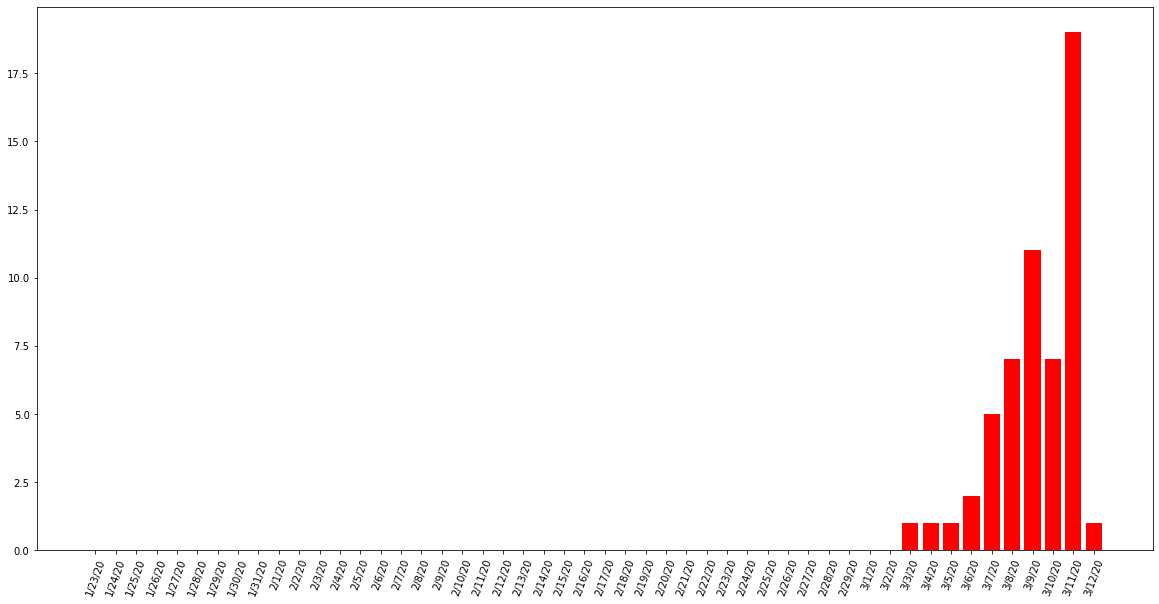

In [37]:
plot_deaths_per_day_spain = plt.bar(days[1:days.size], deaths_per_day_spain[:days.size - 1], color='red')
plt.xticks(rotation=70)
plt.show(plot_deaths_per_day_spain)

### Case fatality

In [38]:
infections_spain = confirmed_infections_spain.values[days.size - 1]
deaths_spain = cumulative_deaths_spain.values[days.size - 1];
case_fatality_spain = (deaths_spain / infections_spain) * 100 
print("Spain's case fatality = %.1f"%case_fatality_spain)  

Spain's case fatality = 2.4


***
## Comparisons
Merged graphs for Italy, Germany, France and Spain

### Confirmed infections

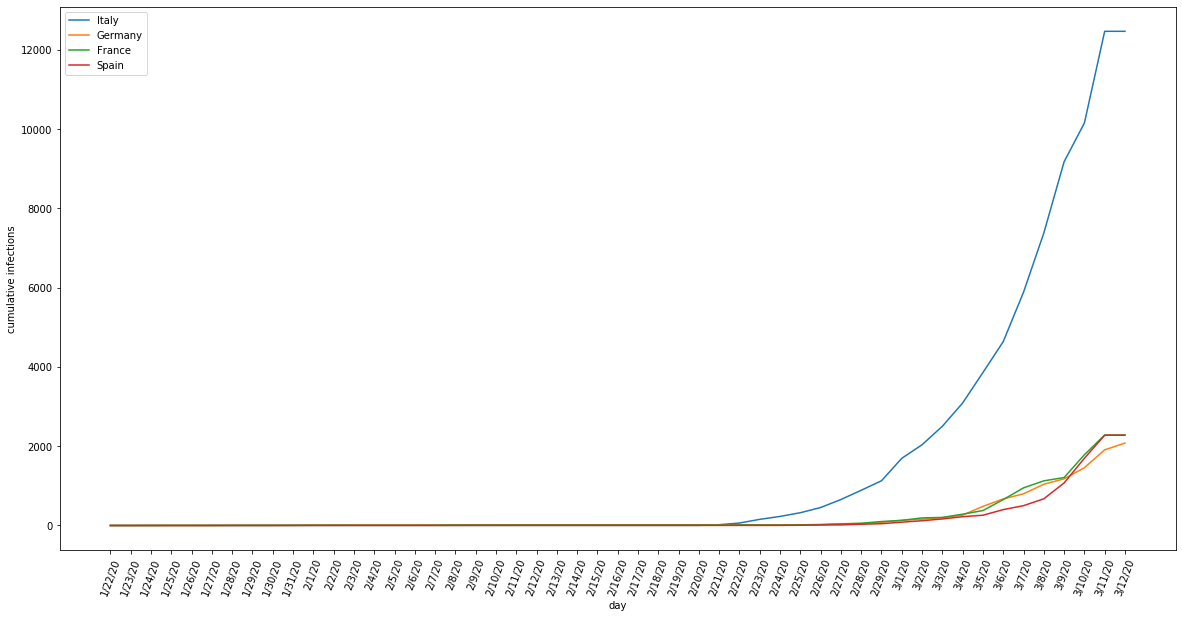

In [39]:
# add labels
plt.xlabel("day")
plt.ylabel("cumulative infections");
plt.xticks(rotation=70)
# plot the data
pi_italy = plt.plot(confirmed_infections_italy, label='Italy')
pi_germany = plt.plot(confirmed_infections_germany, label='Germany')
pi_france = plt.plot(confirmed_infections_france, label='France')
pi_spain = plt.plot(confirmed_infections_spain, label='Spain')
# add legend
plt.legend((pi_italy[0], pi_germany[0], pi_france[0], pi_spain[0]),['Italy','Germany', 'France', 'Spain'])

### Cumulative deaths

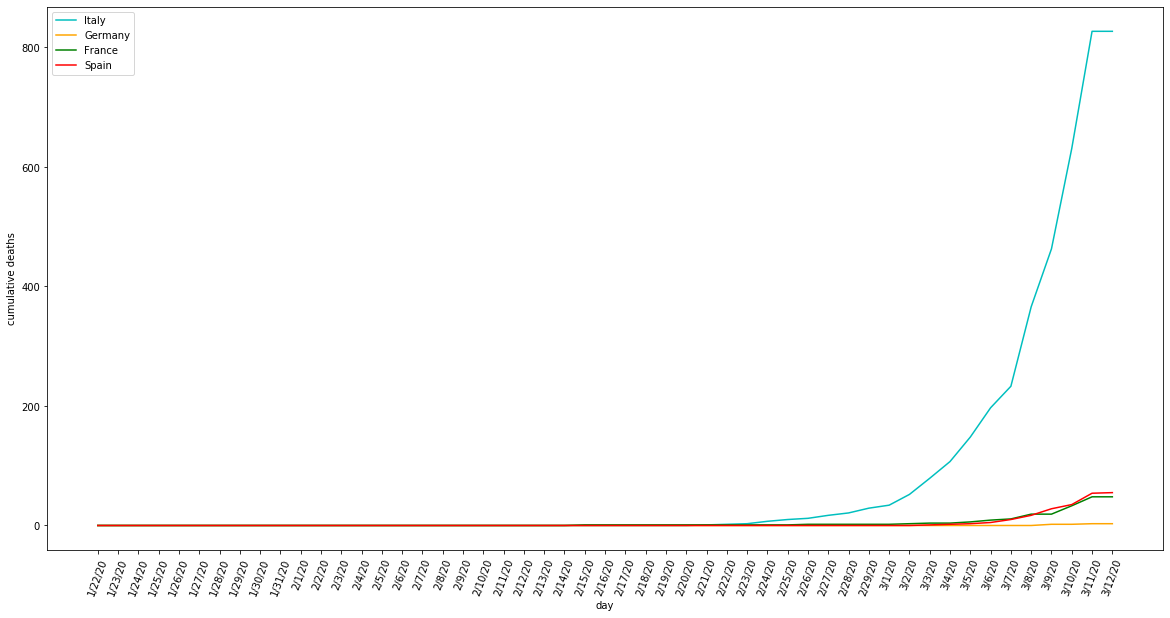

In [40]:
# add labels
plt.xlabel("day")
plt.ylabel("cumulative deaths");
plt.xticks(rotation=70)
# plot the data
pd_italy = plt.plot(cumulative_deaths_italy, label='Italy', color='c')
pd_germany = plt.plot(cumulative_deaths_germany, label='Germany', color='orange')
pd_france = plt.plot(cumulative_deaths_france, label='France', color='green')
pd_spain = plt.plot(cumulative_deaths_spain, label='Spain', color='red')
# add legend
plt.legend((pd_italy[0], pd_germany[0], pd_france[0], pd_spain[0]),['Italy','Germany', 'France', 'Spain'])

### Deaths per day

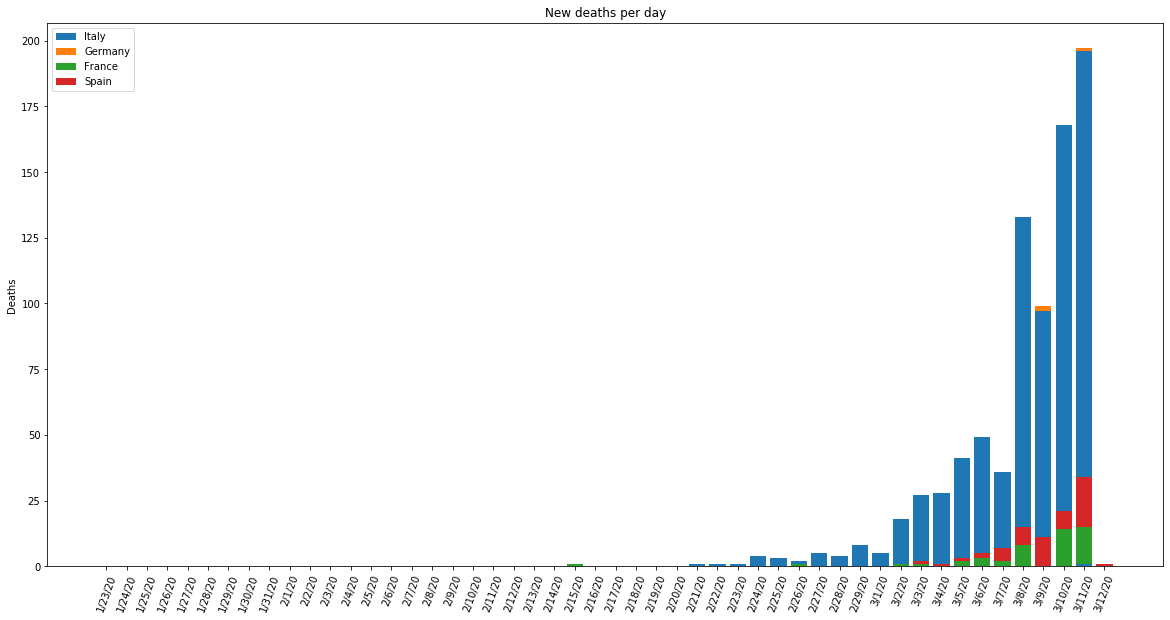

In [41]:
fig, ax = plt.subplots()
plt.ylabel('Deaths')
plt.title('New deaths per day')
pi = plt.bar(days[1:days.size], deaths_per_day_italy[:days.size])
pg = plt.bar(days[1:days.size], deaths_per_day_germany[:days.size], bottom = deaths_per_day_italy[:days.size])
pf = plt.bar(days[1:days.size], deaths_per_day_france[:days.size], bottom = deaths_per_day_germany[:days.size])
ps = plt.bar(days[1:days.size], deaths_per_day_spain[:days.size], bottom = deaths_per_day_france[:days.size])
plt.xticks(rotation=70)
plt.legend((pi[0], pg[0], pf[0], ps[0]), ['Italy', 'Germany', 'France', 'Spain'])
plt.show()